<a href="https://colab.research.google.com/github/UKD1211/bank_customer_churn_prediction/blob/main/bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')

**Displaying the Top5 rows of the DataSet**

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.shape

(10000, 14)

**Get Information about out dataset**


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Checking Null Values**

In [9]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Overall Stat about our DataSet [we will only get the stat for the numerical columns]**

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
## Stat for all the columns
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


**Dropping the Irrelevent Features**

In [12]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Encoding Of Categorical Data**

In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
data = pd.get_dummies(data,drop_first=True)

In [18]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


**Not Handling Imbalanced**

In [19]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [20]:
import seaborn as sns

<Axes: ylabel='count'>

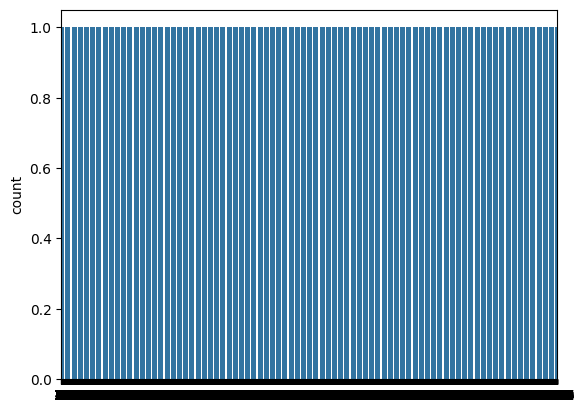

In [21]:
sns.countplot(data['Exited'])

In [26]:
X = data.drop('Exited',axis=1)

In [28]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [29]:
y = data['Exited']

In [30]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


**Handling Imbalance Dataset with SMOTE**

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [33]:
X_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    True               False            True           1
689          46   7       52016.080000   2              1          1               72993.650000     False              False            False          1
             40   4       78119.590000   4              1          0               119259.340000    True               False            False          1
                          78144.212506   3              1          0               119212.118604    True               False            True           1
                  5       154251.670000  1              0          1               118319.500000    False              True             False          1
                                                                                                                                                      ..
608          66   8       123935.350000  1              1          1               65758.190000     False              True             True           1
609          25   10      0.000000       1              0          1               109895.160000    False              False            True           1
             26   7       0.000000       2              1          0               98463.990000     False              False            True           1
                  10      126392.180000  1              0          1               43651.490000     False              False            True           1
850          81   5       0.000000       2              1          1               44827.470000     False              False            True           1
Name: count, Length: 15926, dtype: int64

In [35]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


**Splitting The DataSet in Training Set And Test Set**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [46]:
X_train

array([[-2.63247878,  0.60676156,  0.45067698, ...,  1.31366538,
         1.57296841,  0.80983685],
       [ 1.09976636,  0.1032414 , -1.38617269, ..., -0.76122886,
        -0.63574068,  0.80983685],
       [-1.29718873,  0.30464946, -1.38617269, ..., -0.76122886,
         1.57296841, -1.23481662],
       ...,
       [ 0.20227632,  0.20394543,  1.18541685, ..., -0.76122886,
        -0.63574068,  0.80983685],
       [-0.92505872, -0.60168684, -0.65143282, ...,  1.31366538,
        -0.63574068, -1.23481662],
       [ 0.53062633,  1.00957769, -1.38617269, ...,  1.31366538,
        -0.63574068,  0.80983685]])

# **Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log = LogisticRegression()

In [49]:
log.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred1 = log.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
accuracy_score(y_test,y_pred1)

0.809

In [52]:
accuracy_score(y_test,y_pred1)

0.778405524168236

In [53]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [43]:
precision_score(y_test,y_pred1)

0.5939849624060151

In [54]:
precision_score(y_test,y_pred1)

0.7641921397379913

In [44]:
recall_score(y_test,y_pred1)

0.1941031941031941

In [55]:
recall_score(y_test,y_pred1)

0.7887958789439794

In [45]:
f1_score(y_test,y_pred1)

0.29259259259259257

In [56]:
f1_score(y_test,y_pred1)

0.7762991128010139

In [46]:
confusion_matrix(y_test,y_pred1)

array([[1539,   54],
       [ 328,   79]])

In [57]:
confusion_matrix(y_test,y_pred1)

array([[1255,  378],
       [ 328, 1225]])

In [47]:
# pc = TP/(FP+TP)

In [48]:
# rc = TP/(TP+FN)

# **SVC (Support Vector Classifier)**

In [58]:
from sklearn import svm

In [59]:
svm = svm.SVC()

In [60]:
svm.fit(X_train,y_train)

SVC()

In [62]:
y_pred2 = svm.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred2)

0.8411801632140615

In [64]:
precision_score(y_test,y_pred2)

0.8383968972204267

In [65]:
recall_score(y_test,y_pred2)

0.8351577591757888

In [66]:
f1_score(y_test,y_pred2)

0.8367741935483871

# **KNeighbors Classifier**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [70]:
y_pred3 = knn.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred3)

0.8192090395480226

In [72]:
precision_score(y_test,y_pred3)

0.8051217988757027

# **Decision Tree Classifier**

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier()

In [76]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred4 = dt.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred4)

0.7962962962962963

In [79]:
precision_score(y_test,y_pred4)

0.7817955112219451

In [80]:
recall_score(y_test,y_pred4)

0.8074694140373471

In [81]:
f1_score(y_test,y_pred4)


0.7944250871080138

# **Random Forest Classifier**

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier()

In [84]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
y_pred5 = rf.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred5)

0.8628374136848713

In [87]:
precision_score(y_test,y_pred5)

0.8576923076923076

In [88]:
recall_score(y_test,y_pred5)

0.8615582743077914

In [89]:
f1_score(y_test,y_pred5)


0.8596209444265982

# **Gradient Boosting Classifier**

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbc = GradientBoostingClassifier()

In [92]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [93]:
y_pred6 = gbc.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred6)

0.837413684871312

In [95]:
precision_score(y_test,y_pred6)

0.8402366863905325

In [96]:
recall_score(y_test,y_pred6)

0.8229233741146169

In [97]:
f1_score(y_test,y_pred6)

0.8314899154196488

In [106]:
final_data = pd.DataFrame({'Models':['LR','SVC','KN','DT','RFC','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6),]})

In [107]:
final_data

,Models,ACC
0,LR,0.778406
1,SVC,0.841180
2,KN,0.819209
3,DT,0.796296
4,RFC,0.862837
5,GBC,0.837414


In [108]:
final_data.to_csv('Acc.csv')

# **Visualization**

In [109]:
import seaborn as sns

<ipython-input-113-c8e430f7a271>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette=colors)


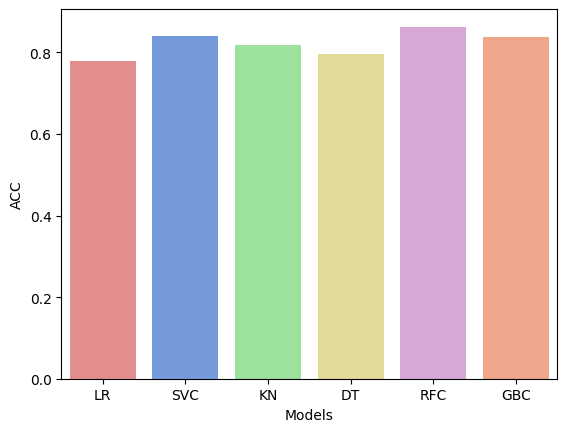

In [113]:
import matplotlib.pyplot as plt

colors = ['lightcoral', 'cornflowerblue', 'lightgreen', 'khaki', 'plum', 'lightsalmon']

sns.barplot(x='Models', y='ACC', data=final_data, palette=colors)
plt.show()

In [116]:
final_data = pd.DataFrame({'Models':['LR','SVC','KN','DT','RFC','GBC'],
                           'PRE':[precision_score(y_test,y_pred1),
                                  precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),
                                  precision_score(y_test,y_pred4),
                                  precision_score(y_test,y_pred5),
                                  precision_score(y_test,y_pred6),]})

In [117]:
final_data

,Models,PRE
0,LR,0.764192
1,SVC,0.838397
2,KN,0.805122
3,DT,0.781796
4,RFC,0.857692
5,GBC,0.840237


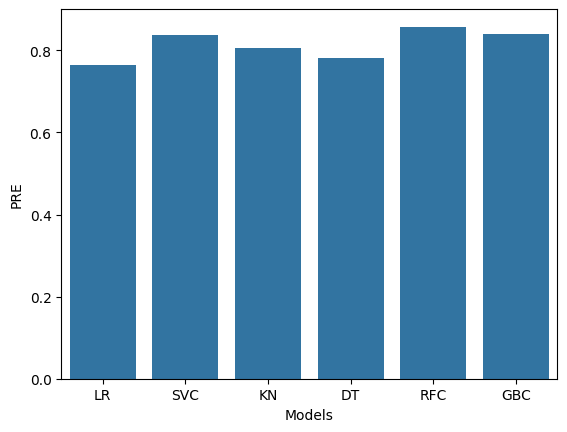

In [118]:
sns.barplot(x='Models', y='PRE', data=final_data)
plt.show()

**Save The Model**

In [119]:
X_res = sc.fit_transform(X_res)

In [120]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [121]:
import joblib

In [122]:
joblib.dump(rf,'Churn_Model_pred.pkl')

['Churn_Model_pred.pkl']

In [124]:
model = joblib.load('/content/Churn_Model_pred.pkl')

In [125]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [129]:
pred = model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

In [130]:
if(pred == 0):
  print('Customer will not leave the bank')
else:
  print('Customer will leave the bank')

Customer will leave the bank
